In [7]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'lon':   [121.39, 126.19, 130.27, 127.42, 126.14, 125.96, 123.15, 130.5, 129.08, 122.74],
    'lat':   [13.51, 12.02, 13.11, 10.09, 15.33, 14, 10.88, 11.18, 15.78, 15.82],
    'value': [1.494, 1.934, 2.148, 9.155, 2.221, 8.1, 2.039, 1.916, 3.729, 7.137] 
})

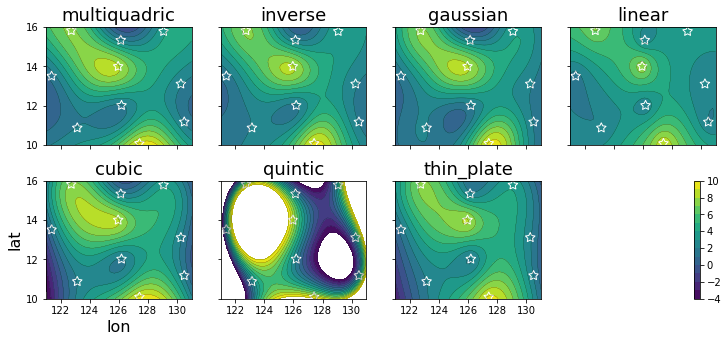

In [18]:
from scipy.interpolate.rbf import Rbf  # radial basis functions

lon_grid = np.linspace(121, 131, 50)
lat_grid = np.linspace(10, 16, 70)
LON, LAT = np.meshgrid(lon_grid, lat_grid)

vmin = -4
vmax = 10
clevels = np.linspace(vmin, vmax, vmax-vmin+1)

funcs = ['multiquadric', 'inverse', 'gaussian', 'linear', 
         'cubic', 'quintic', 'thin_plate']

fsize_label = 16
fsize_title = 18
fig, ax = plt.subplots(2,4, figsize=(12,5), sharey=True, sharex=True)
i, j = 0, 0
for func in funcs:
    rbf_fun = Rbf(df.lon, df.lat, df.value, function=func)
    z_new = rbf_fun(LON.ravel(), LAT.ravel()).reshape(LON.shape)
    im = ax[i][j].contourf(LON, LAT, z_new, 
                           levels=clevels, cmap='viridis')
    ax[i][j].contour(LON, LAT, z_new, 
                    levels=clevels, colors='black',
                    linewidths=0.2)
    ax[i][j].scatter(df.lon, df.lat, s=100, edgecolors='w', 
            c='none', marker=(5, 1))
    ax[i][j].set_title(func, fontsize=fsize_title)
    ax[i][j].set_xticks([122, 124, 126, 128, 130])
    j += 1
    if j==4:
        i+=1; j=0

ax[1][0].set_xlabel('lon', fontsize=fsize_label)
ax[1][0].set_ylabel('lat', fontsize=fsize_label)
fig.delaxes(ax[1][3])
fig.subplots_adjust(hspace=0.3)
fig.colorbar(im, ax=ax[1][3])
fig.savefig('interpolation.jpg')